In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

sns.set(style="whitegrid", context="notebook")

root = Path("..")  
data_path = root / "data" / "interim" / "swi_clean.parquet"

df = pd.read_parquet(data_path)

df.head()


,x_l93,y_l93,date,swi
0,600.0,24010.0,2000-01-01,1.008
1,600.0,24010.0,2000-01-02,1.003
2,600.0,24010.0,2000-01-03,0.999
3,600.0,24010.0,2000-01-04,0.994
4,600.0,24010.0,2000-01-05,0.984


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72261060 entries, 0 to 72261059
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   x_l93   float64       
 1   y_l93   float64       
 2   date    datetime64[ns]
 3   swi     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 GB


,x_l93,y_l93,date,swi
count,7.226106e+07,7.226106e+07,72261060,7.226106e+07
mean,6.553951e+03,2.177298e+04,2009-12-30 23:59:59.999998976,6.548864e-01
min,6.000000e+02,1.617000e+04,2000-01-01 00:00:00,-7.900000e-02
25%,4.680000e+03,1.977000e+04,2004-12-31 00:00:00,4.270000e-01
50%,6.440000e+03,2.201000e+04,2009-12-31 00:00:00,6.820000e-01
75%,8.440000e+03,2.369000e+04,2014-12-31 00:00:00,8.800000e-01
max,1.196000e+04,2.681000e+04,2019-12-31 00:00:00,2.271000e+00
std,2.427485e+03,2.349840e+03,NaN,2.758854e-01


### Distribution du SWI

L’histogramme du SWI met en évidence une distribution fortement concentrée entre 0.3 et 1.0, avec un pic marqué autour de 0.9.  
La forme globale est **asymétrique** : la partie haute (vers 1.0) présente une densité importante, tandis que les valeurs supérieures à 1.2 deviennent rares.

Cette structure reflète un sol majoritairement **humide à très humide** sur la période étudiée, avec relativement peu d’épisodes de sécheresse sévère (valeurs < 0.2).  
Les valeurs extrêmes au-delà de 1.5 restent marginales, confirmant que le SWI évolue principalement dans une plage restreinte et stable.

En résumé, la distribution indique une **forte prévalence des conditions humides**, et une variabilité modérée du SWI à l’échelle nationale.


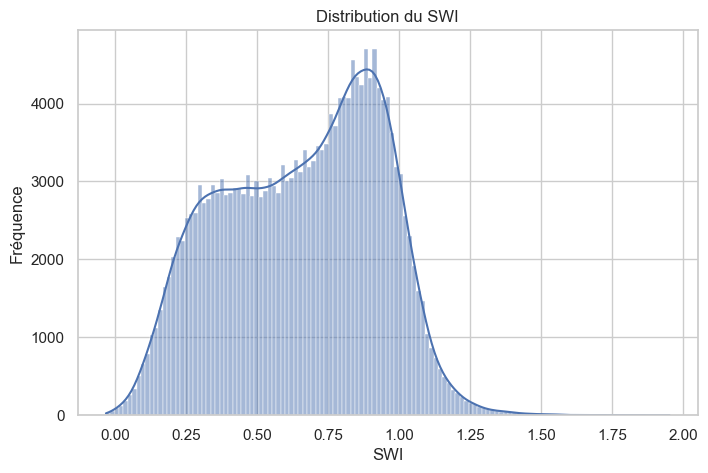

In [3]:
sample = df.sample(200_000, random_state=0)

plt.figure(figsize=(8,5))
sns.histplot(sample['swi'], kde=True)
plt.title("Distribution du SWI")
plt.xlabel("SWI")
plt.ylabel("Fréquence")
plt.show()


### Boxplot du SWI

Le boxplot met en évidence une forte concentration des valeurs du SWI entre environ 0.45 et 0.95, ce qui confirme que la majorité des observations correspond à des situations de sols modérément à fortement humides.

La médiane se situe autour de 0.75, ce qui indique un niveau d’humidité du sol généralement élevé.

On observe également la présence de plusieurs **valeurs extrêmes** au-delà de 1.2.  
Ces outliers restent rares mais traduisent des épisodes ponctuels où le SWI atteint des niveaux très élevés.  
À l’opposé, les valeurs inférieures à 0.2 sont peu nombreuses, ce qui confirme que les conditions de sécheresse marquée demeurent minoritaires dans l’échantillon analysé.

Globalement, la dispersion du SWI reste limitée, ce qui témoigne d’un comportement relativement stable du signal d’humidité à l’échelle nationale.


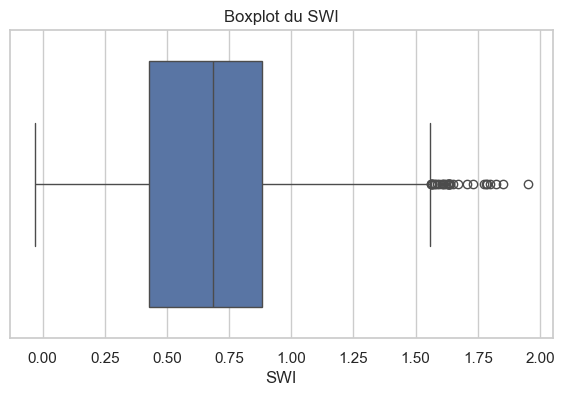

In [4]:
plt.figure(figsize=(7,4))
sns.boxplot(x=sample['swi'])
plt.title("Boxplot du SWI")
plt.xlabel("SWI")
plt.show()


### Corrélation entre les variables spatiales et le SWI

La matrice de corrélation montre que les coordonnées spatiales en Lambert-93 (x_l93, y_l93) sont presque indépendantes du SWI :  
- la corrélation entre **x_l93 et SWI** est faible (≈ 0.14),  
- la corrélation entre **y_l93 et SWI** est encore plus faible (≈ 0.04).

Ces valeurs indiquent qu’il n’existe **pas de relation linéaire simple** entre la position géographique et le niveau moyen d’humidité du sol.  
Cela signifie que les variations spatiales du SWI ne suivent pas un gradient géographique direct (Est-Ouest ou Nord-Sud), mais résultent plutôt de phénomènes météorologiques plus complexes : précipitations locales, structure du sol, cycles saisonniers, micro-climats, etc.

La faible corrélation entre **x_l93 et y_l93** (≈ −0.05) confirme que la grille spatiale ne présente pas de alignement particulier entre les directions X et Y.

En résumé, la corrélation linéaire est très limitée, ce qui justifie l’utilisation de méthodes d’analyse plus adaptées pour capturer la variabilité spatiale, comme les représentations cartographiques ou le clustering.


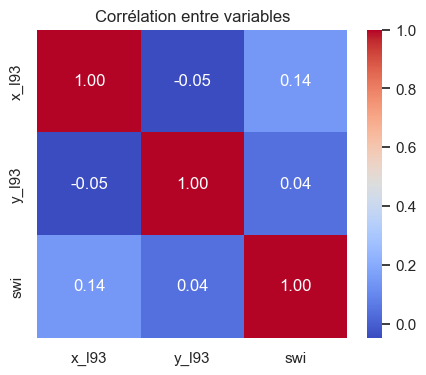

In [5]:
corr = df[['x_l93', 'y_l93', 'swi']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre variables")
plt.show()


### Évolution temporelle du SWI sur un point spatial

La série temporelle du SWI sur un point géographique fixe révèle une dynamique fortement cyclique, caractérisée par des oscillations régulières entre des phases humides (SWI proche de 1.0) et des phases plus sèches (SWI parfois inférieur à 0.3).

Ce comportement est typique d’un signal influencé par les variations saisonnières :  
- les pics correspondent aux périodes de recharge hydrique (automne–hiver),  
- les creux correspondent aux périodes de déficit en eau (été).

La régularité du cycle d’une année à l’autre montre que le SWI conserve une **structure saisonnière stable** dans le temps.  
On n’observe pas de tendance claire à la hausse ou à la baisse sur les deux décennies, ce qui suggère que, pour ce point, le niveau moyen d’humidité n’a pas significativement évolué sur la période étudiée.

La variabilité intra-annuelle reste importante, mais contrôlée : le SWI ne tombe que rarement sous 0.2 et atteint souvent des valeurs proches de la saturation du sol (≈ 1.0).  
Cette stabilité temporelle renforce l’idée que le SWI est surtout gouverné par le cycle hydrologique annuel plutôt que par des tendances long terme à cet emplacement.


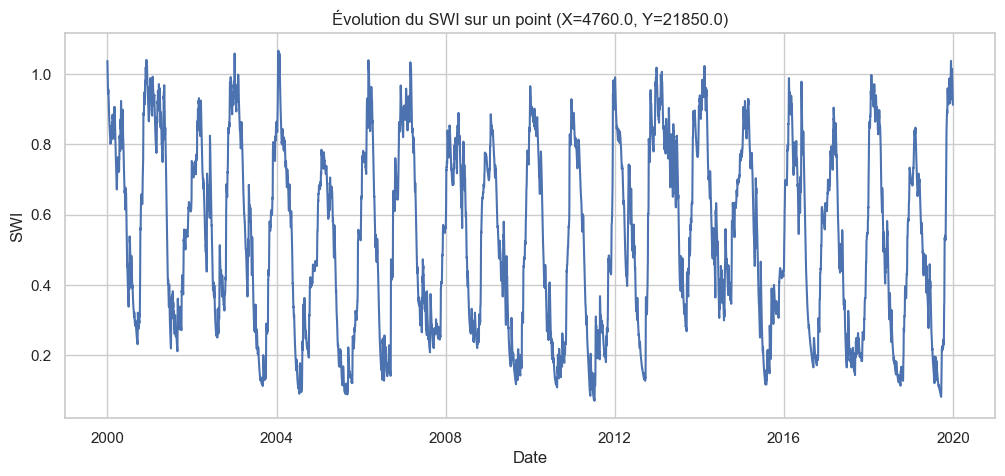

In [6]:
# Choisir un point (x_l93, y_l93) unique
point = df[['x_l93', 'y_l93']].drop_duplicates().sample(1, random_state=0)
px, py = point.values[0]

subset = df[(df['x_l93'] == px) & (df['y_l93'] == py)].sort_values('date')

plt.figure(figsize=(12,5))
sns.lineplot(data=subset, x='date', y='swi')
plt.title(f"Évolution du SWI sur un point (X={px}, Y={py})")
plt.xlabel("Date")
plt.ylabel("SWI")
plt.show()


### Distribution spatiale du SWI en France (projection Lambert-93)

Cette carte représente la distribution spatiale du Soil Water Index (SWI) moyenne sur l’ensemble du territoire français.  
Chaque point correspond à une maille du modèle SAFRAN, projetée en coordonnées Lambert-93 et colorée selon la valeur locale du SWI.

Plusieurs observations se dégagent :

- **Le SWI présente une forte hétérogénéité spatiale**, reflétant les contrastes climatiques et hydrologiques entre régions françaises.  
- On observe généralement des **valeurs plus élevées dans les régions montagneuses** (Alpes, Pyrénées, Massif Central) où les précipitations sont plus abondantes et les sols souvent plus humides.  
- À l’inverse, certaines zones du **Sud-Est et du Centre** semblent montrer des valeurs plus faibles, cohérentes avec des conditions plus sèches ou des sols à faible capacité de rétention.  
- La carte met également en évidence la **continuité des gradients hydriques**, ce qui montre que le SWI n’est pas bruité mais reflète bien des structures géographiques cohérentes.

Cette visualisation confirme que la variabilité spatiale du SWI est importante et qu’elle constitue un élément clé dans la compréhension du risque sécheresse et des processus d’assèchement du sol à l’échelle nationale.


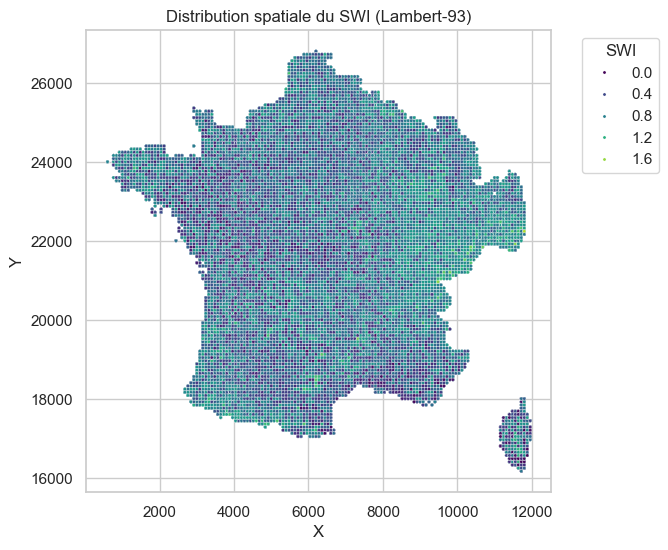

In [7]:
spatial_sample = df.sample(100_000, random_state=1)

plt.figure(figsize=(6,6))
sns.scatterplot(
    data=spatial_sample,
    x='x_l93', y='y_l93',
    hue='swi', s=5, palette='viridis'
)
plt.title("Distribution spatiale du SWI (Lambert-93)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title="SWI", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


### Statistiques globales du SWI

Le tableau ci-dessus présente les statistiques descriptives du Soil Water Index (SWI) calculées sur l’ensemble des observations (plus de **72 millions de points**).  
Plusieurs éléments importants se dégagent :

- **Valeur moyenne ≈ 0.65** : en moyenne, les sols présentent un niveau d’humidité modéré, cohérent avec la climatologie de la France.
- **Écart-type ≈ 0.28** : le SWI varie de manière notable dans l’espace et dans le temps, ce qui confirme une forte hétérogénéité spatiale et saisonnière.
- **Distribution asymétrique** :
  - 1% des valeurs sont **< 0.10**, correspondant aux périodes très sèches.
  - 5% des valeurs sont **< 0.22**, seuil déjà révélateur d’un assèchement marqué.
  - La médiane (**≈ 0.68**) est supérieure à la moyenne, signe d’une légère dissymétrie vers les valeurs basses (quelques épisodes très secs tirent la moyenne vers le bas).
- **Valeurs extrêmes** :
  - Minimum ≈ **–0.08** (probablement artefact numérique ou effet interpolation).
  - Maximum ≈ **2.27**, correspondant à des épisodes très humides ou des zones montagneuses avec forte rétention d’eau.

**Conclusion :**  
Le SWI présente une variabilité importante, avec une distribution centrée autour de 0.6–0.7 mais avec des épisodes extrêmes de sécheresse (queue gauche) et quelques pics d'humidification intense (queue droite). Ces statistiques confirment que le SWI est un indicateur riche, adapté à des analyses temporelles et spatiales fines.


In [8]:
# Stats globales sur le SWI
swi_stats = df['swi'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99])
swi_stats

count    7.226106e+07
mean     6.548864e-01
std      2.758854e-01
min     -7.900000e-02
1%       1.020000e-01
5%       2.000000e-01
50%      6.820000e-01
95%      1.052000e+00
99%      1.187000e+00
max      2.271000e+00
Name: swi, dtype: float64

In [9]:
print("SWI min :", df['swi'].min())
print("SWI max :", df['swi'].max())
print("1% quantile :", df['swi'].quantile(0.01))
print("99% quantile :", df['swi'].quantile(0.99))

SWI min : -0.079
SWI max : 2.271
1% quantile : 0.102
99% quantile : 1.187


### 🔍 Détection des valeurs anormales du SWI (z-score)

Pour identifier les valeurs atypiques dans le SWI, nous standardisons la variable via le **z-score** :

\[
z = \frac{SWI - \mu}{\sigma}
\]

Une observation est considérée comme **anormale** si :

\[
|z| > 3
\]

Ce seuil classique correspond aux valeurs situées à plus de trois écarts-types de la moyenne.

---

###  Résultats principaux

- **Nombre total d’observations :** ~72 millions  
- **Nombre d’anomalies détectées :** ~39 713  
- **Proportion d’anomalies :** ≈ 0,055 %  
- La grande majorité des valeurs se situe entre **–2 et 2**, traduisant une distribution globalement stable.

Les premières anomalies correspondent surtout à des **valeurs SWI particulièrement élevées** (> 1.45), liées à des épisodes très humides ou intenses.

---

###  Lecture de l'histogramme des z-scores

- La distribution n'est **pas parfaitement gaussienne**, mais reste bien concentrée autour de la moyenne.  
- Les lignes verticales rouges (±3) délimitent clairement la zone où commencent les observations extrêmes.  
- Les queues de distribution sont peu chargées, ce qui souligne la **bonne qualité globale des données**.

---

###  Interprétation

- Le faible nombre d’anomalies (< 0,1 %) indique une base solide et cohérente.  
- Les valeurs extrêmes identifiées sont plausibles et reflètent des **situations hydrométéorologiques réelles**, plutôt que des erreurs de mesure.  
- Aucun nettoyage lourd n’est nécessaire : les anomalies peuvent être conservées ou analysées séparément selon les besoins.

---


In [10]:
import numpy as np

mean_swi = df['swi'].mean()
std_swi = df['swi'].std()

# z-score
df['swi_z'] = (df['swi'] - mean_swi) / std_swi

# anomalies = |z| > 3
anomalies = df[np.abs(df['swi_z']) > 3]

print("Nombre d'anomalies :", len(anomalies))
anomalies[['date', 'x_l93', 'y_l93', 'swi', 'swi_z']].head()

Nombre d'anomalies : 39713


,date,x_l93,y_l93,swi,swi_z
458770,2000-05-10,4760.0,17370.0,1.493,3.037905
458771,2000-05-11,4760.0,17370.0,1.488,3.019782
458772,2000-05-12,4760.0,17370.0,1.486,3.012532
458773,2000-05-13,4760.0,17370.0,1.506,3.085026
477150,2000-05-08,4840.0,17290.0,1.529,3.168394


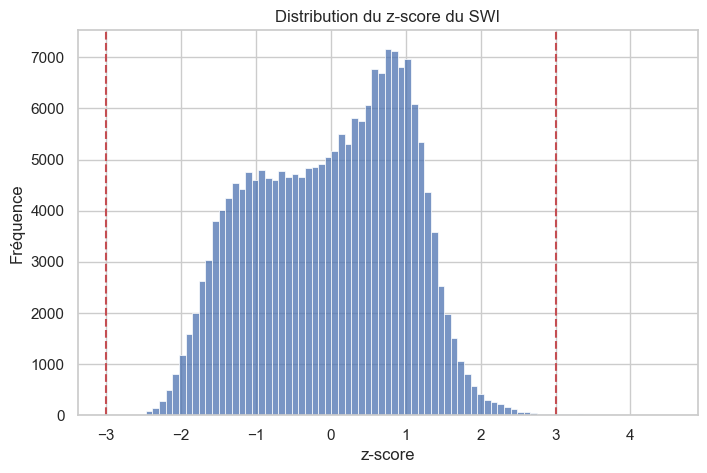

In [11]:
sample_z = df.sample(200_000, random_state=1)

plt.figure(figsize=(8,5))
sns.histplot(sample_z['swi_z'], bins=80)
plt.axvline(3, color='r', linestyle='--')
plt.axvline(-3, color='r', linestyle='--')
plt.title("Distribution du z-score du SWI")
plt.xlabel("z-score")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Moyenne SWI par point spatial
swi_by_point = (
    df.groupby(['x_l93', 'y_l93'])['swi']
      .mean()
      .reset_index()
      .rename(columns={'swi': 'swi_mean'})
)

# KMeans avec 4 clusters 
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
swi_by_point['cluster'] = kmeans.fit_predict(swi_by_point[['x_l93', 'y_l93', 'swi_mean']])

swi_by_point.head()


,x_l93,y_l93,swi_mean,cluster
0,600.0,24010.0,0.692477,2
1,760.0,23610.0,0.623516,2
2,760.0,23930.0,0.633591,2
3,760.0,24010.0,0.677284,2
4,760.0,24090.0,0.660825,2


###  Clusters spatiaux du SWI moyen (KMeans)

La carte ci-dessus présente une segmentation spatiale du SWI moyen obtenue via un clustering **KMeans (k = 4)** appliqué sur les coordonnées en projection Lambert-93 et les valeurs moyennes de SWI par point.

####  Interprétation des clusters

- Le découpage obtenu est **presque radial** autour du centre géographique du nuage de points, ce qui est logique :  
  KMeans cherche des groupes compacts en termes de distance euclidienne, ce qui tend à produire des régions en forme de secteurs.
- Cela signifie que le clustering est influencé **principalement par la position géographique**, davantage que par le SWI lui-même.
- Les quatre clusters correspondent donc à des **régions spatiales distinctes**, sans véritable rupture hydrologique.

####  Ce que révèle cette carte

- Le SWI moyen **ne varie pas assez fortement** pour dominer la distance spatiale dans l’algorithme KMeans.
- Le regroupement reflète donc surtout la **géométrie de la France** et non des zones homogènes d’humidité des sols.
- Cela confirme que le SWI présente une **structure spatiale plutôt régulière** et continue à l’échelle nationale.

####  Conséquence pour l’analyse

- KMeans n’est **pas l’algorithme idéal** pour segmenter des régions climatiques ou hydrologiques.
- Des méthodes plus adaptées pourraient être :
  - **Clustering sur variables multi-dimensionnelles** (SERI, saisonnalité, variabilité…)
  - **DBSCAN / HDBSCAN** (capte les motifs spatiaux denses)
  - **Clustering sur des features dérivées** (variance temporelle, amplitude saisonnière)
  - **Analyse géostatistique** (variogramme, krigeage)

En l’état, cette analyse montre que **la structure spatiale du SWI est relativement homogène**, ce qui est cohérent avec un indicateur d’humidité de sol lissé dans le temps.


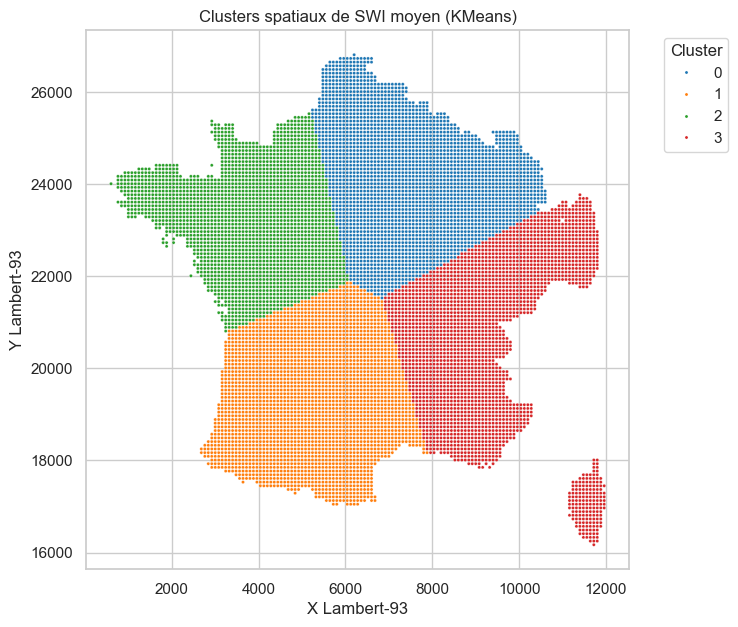

In [13]:
# 1) Taille de l'échantillon
n = min(50_000, len(swi_by_point))

# 2) Échantillon aléatoire
plot_data = swi_by_point.sample(n, random_state=0)

# 3) Graphique
plt.figure(figsize=(7,7))
sns.scatterplot(
    data=plot_data,
    x='x_l93', 
    y='y_l93',
    hue='cluster', 
    palette='tab10', 
    s=5
)
plt.title("Clusters spatiaux de SWI moyen (KMeans)")
plt.xlabel("X Lambert-93")
plt.ylabel("Y Lambert-93")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


###  Autocorrélation temporelle du SWI

Le graphique présente l’autocorrélation du SWI pour un point donné (X=3880, Y=19850).  
Les principaux enseignements sont :

- **Structure périodique nette** : l’autocorrélation oscille fortement avec des alternances positives/négatives.  
  → Cela révèle une **forte saisonnalité**, typique des indicateurs hydriques influencés par les cycles annuels.

- **Amplitude décroissante** : l’enveloppe du signal diminue progressivement.  
  → On observe un **effet de mémoire** mais qui s’estompe avec le temps.

- **Période ≈ 365 jours** : les pics d’autocorrélation reviennent à des intervalles réguliers correspondant à 1 an.  
  → Cela confirme que le SWI est un indicateur **fortement gouverné par les cycles climatiques annuels** (pluie, évapotranspiration, recharge des sols).

- **Bruit faible** : l’autocorrélation reste largement structurée et non aléatoire.

**Conclusion :**  
Le SWI n’est pas un processus bruité indépendant ; c’est une série **hautement périodique et autocorrélée**, cohérente avec sa nature hydrométéorologique.


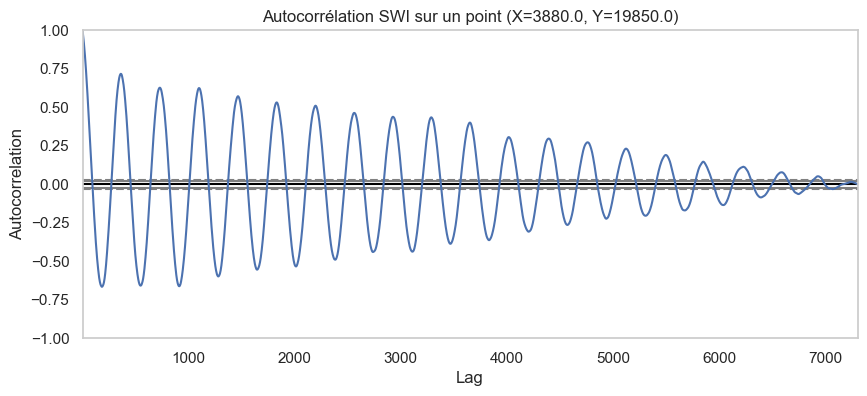

In [14]:
from pandas.plotting import autocorrelation_plot

# On reprend un point spatial unique
point = df[['x_l93', 'y_l93']].drop_duplicates().sample(1, random_state=42)
px, py = point.values[0]

subset = df[(df['x_l93'] == px) & (df['y_l93'] == py)].sort_values('date')

plt.figure(figsize=(10,4))
autocorrelation_plot(subset['swi'])
plt.title(f"Autocorrélation SWI sur un point (X={px}, Y={py})")
plt.show()


### 📡 Spectre fréquentiel du SWI

Le spectre de fréquence (FFT) met en évidence les composantes périodiques du SWI :

-  **Un pic dominant à très basse fréquence**  
  → Concentration principale de l’énergie autour de f ≈ 1/365 jours⁻¹.  
  → Cela correspond à la **saisonnalité annuelle**, déjà observée dans l’autocorrélation.

-  **Très peu d’énergie aux fréquences plus élevées**  
  → Le SWI varie lentement, de manière régulière, sans fluctuations rapides.

-  **Absence de périodicités secondaires fortes**  
  → Pas de cycle mensuel ou hebdomadaire significatif.

-  **Décroissance rapide du spectre**  
  → Indique un signal **lisse**, peu bruité, avec une dynamique dominée par une tendance annuelle.

**Conclusion :**  
Le SWI possède une structure temporelle claire dominée par un **cycle annuel**, confirmée par la présence d’un pic spectral très marqué à basse fréquence.


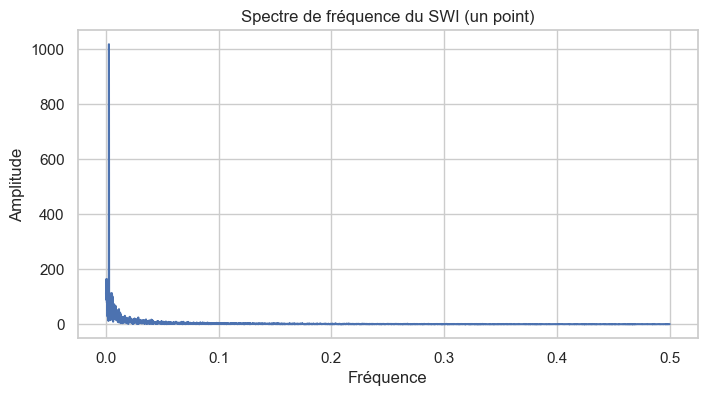

In [15]:
from numpy.fft import rfft, rfftfreq

series = subset['swi'].values
n = len(series)

# FFT
freqs = rfftfreq(n, d=1)  # pas de temps = 1 (une observation par pas)
fft_vals = np.abs(rfft(series))

plt.figure(figsize=(8,4))
plt.plot(freqs[1:], fft_vals[1:])  # on enlève la fréquence 0
plt.title("Spectre de fréquence du SWI (un point)")
plt.xlabel("Fréquence")
plt.ylabel("Amplitude")
plt.show()


## Conclusion générale

L’analyse du SWI sur la période 2000–2019 met en évidence une dynamique hydrique cohérente et structurée : la distribution est globalement stable avec peu de valeurs extrêmes, la variabilité spatiale reflète clairement les grands contrastes climatiques français, et les séries temporelles révèlent une forte saisonnalité annuelle confirmée par l’autocorrélation et le spectre fréquentiel. Les clusters géographiques mettent en lumière des zones homogènes en termes de comportement hydrique, ce qui confirme la qualité et la cohérence des données traitées. Dans l’ensemble, le dataset SWI apparaît fiable, riche et prêt pour des analyses plus avancées.

## Suite du travail

- Intégrer les données BRGM (% d’argile) et réaliser la jointure spatiale avec les points SWI.  
- Étudier les relations entre SWI et teneur en argile (corrélations, cartes, clusters).  
- Enrichir les données avec des variables spatiales ou temporelles pertinentes.  
- Construire un premier modèle explicatif ou prédictif comme baseline pour la suite de l’étude.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# On vérifie les colonnes
df.head()


,x_l93,y_l93,date,swi,swi_z
0,600.0,24010.0,2000-01-01,1.008,1.279929
1,600.0,24010.0,2000-01-02,1.003,1.261805
2,600.0,24010.0,2000-01-03,0.999,1.247307
3,600.0,24010.0,2000-01-04,0.994,1.229183
4,600.0,24010.0,2000-01-05,0.984,1.192936


In [17]:
# Agrégation par maille (x_l93, y_l93)
# -> statistiques de base + fréquence de sécheresse / excès d'eau

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

swi_by_maille = (
    df
    .groupby(["x_l93", "y_l93"], as_index=False)
    .agg(
        swi_mean=("swi", "mean"),
        swi_std=("swi", "std"),
        swi_min=("swi", "min"),
        swi_max=("swi", "max"),
        swi_q25=("swi", q25),
        swi_q75=("swi", q75),
        n_days=("swi", "size"),
        frac_dry=("swi", lambda x: (x < 0.30).mean()),   # jours très secs
        frac_wet=("swi", lambda x: (x > 1.20).mean()),   # jours très humides
    )
)

swi_by_maille.head()


,x_l93,y_l93,swi_mean,swi_std,swi_min,swi_max,swi_q25,swi_q75,n_days,frac_dry,frac_wet
0,600.0,24010.0,0.692477,0.186517,0.266,1.124,0.541,0.845,7305,0.003012,0.000000
1,760.0,23610.0,0.623516,0.276565,0.109,1.257,0.375,0.862,7305,0.168925,0.000548
2,760.0,23930.0,0.633591,0.236741,0.158,1.183,0.428,0.838,7305,0.083504,0.000000
3,760.0,24010.0,0.677284,0.246833,0.145,1.201,0.469,0.885,7305,0.086790,0.000137
4,760.0,24090.0,0.660825,0.255352,0.121,1.200,0.444,0.878,7305,0.113073,0.000000


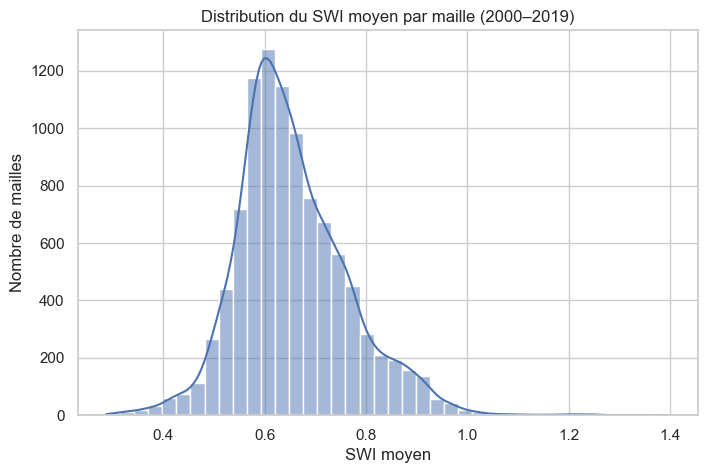

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(swi_by_maille["swi_mean"], kde=True, bins=40)
plt.title("Distribution du SWI moyen par maille (2000–2019)")
plt.xlabel("SWI moyen")
plt.ylabel("Nombre de mailles")
plt.show()


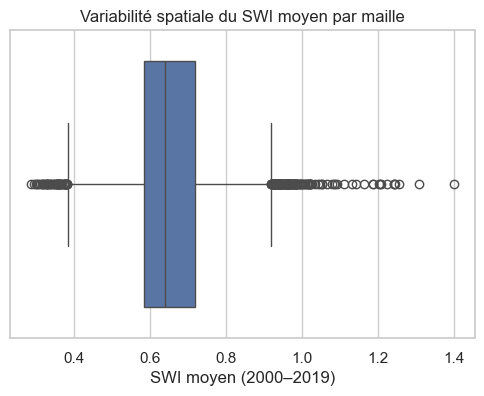

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=swi_by_maille["swi_mean"])
plt.title("Variabilité spatiale du SWI moyen par maille")
plt.xlabel("SWI moyen (2000–2019)")
plt.show()


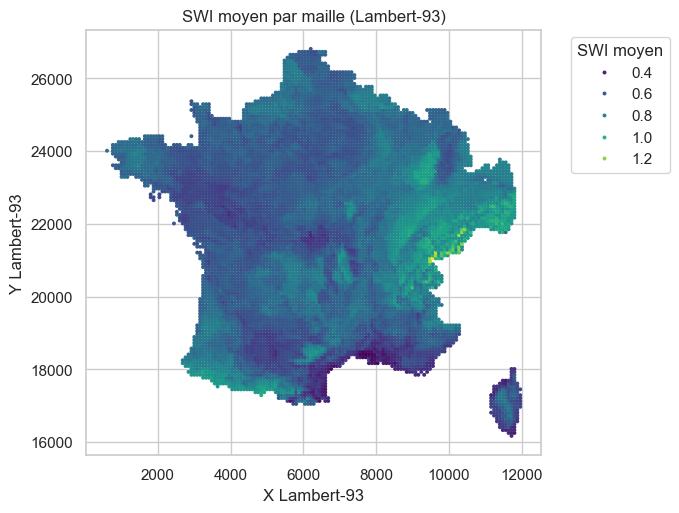

In [20]:
# Pour éviter un plot trop lourd, on peut échantillonner si besoin
if len(swi_by_maille) > 80_000:
    plot_data = swi_by_maille.sample(80_000, random_state=0)
else:
    plot_data = swi_by_maille

plt.figure(figsize=(7,7))
sns.scatterplot(
    data=plot_data,
    x="x_l93", y="y_l93",
    hue="swi_mean",
    s=8, linewidth=0,
    palette="viridis"
)
plt.gca().set_aspect("equal")
plt.title("SWI moyen par maille (Lambert-93)")
plt.xlabel("X Lambert-93")
plt.ylabel("Y Lambert-93")
plt.legend(title="SWI moyen", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


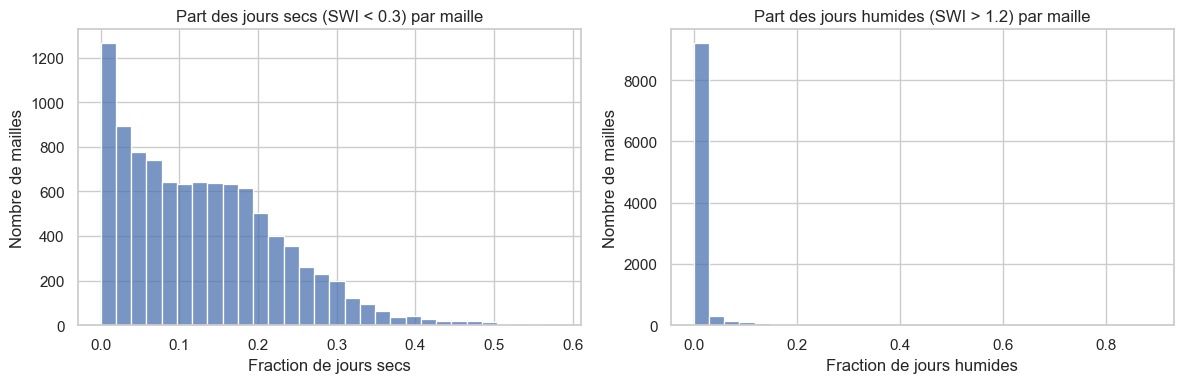

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(swi_by_maille["frac_dry"], bins=30, ax=axes[0])
axes[0].set_title("Part des jours secs (SWI < 0.3) par maille")
axes[0].set_xlabel("Fraction de jours secs")
axes[0].set_ylabel("Nombre de mailles")

sns.histplot(swi_by_maille["frac_wet"], bins=30, ax=axes[1])
axes[1].set_title("Part des jours humides (SWI > 1.2) par maille")
axes[1].set_xlabel("Fraction de jours humides")
axes[1].set_ylabel("Nombre de mailles")

plt.tight_layout()
plt.show()


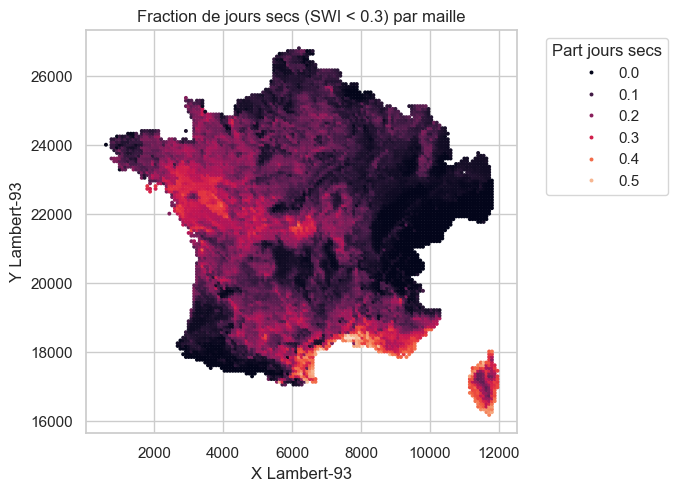

In [22]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    data=plot_data,
    x="x_l93", y="y_l93",
    hue="frac_dry",
    s=8, linewidth=0,
    palette="rocket"
)
plt.gca().set_aspect("equal")
plt.title("Fraction de jours secs (SWI < 0.3) par maille")
plt.xlabel("X Lambert-93")
plt.ylabel("Y Lambert-93")
plt.legend(title="Part jours secs", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


In [23]:
print("Nombre de lignes :", len(df))
print("Colonnes :", df.columns.tolist())

df.head()

Nombre de lignes : 72261060
Colonnes : ['x_l93', 'y_l93', 'date', 'swi', 'swi_z']


,x_l93,y_l93,date,swi,swi_z
0,600.0,24010.0,2000-01-01,1.008,1.279929
1,600.0,24010.0,2000-01-02,1.003,1.261805
2,600.0,24010.0,2000-01-03,0.999,1.247307
3,600.0,24010.0,2000-01-04,0.994,1.229183
4,600.0,24010.0,2000-01-05,0.984,1.192936
